# Time series Analysis in Python

## Chapter 1:  Correlation and Autocorrelation
> A Summary of lecture "Time Series Analysis in Python", via datacamp

- toc: true 
- badges: true
- comments: true
- author: Chanseok Kang
- categories: [Python, Datacamp, Time-series Analysis]
- image: 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (10, 5)

## Introduction to Course


### A "Thin" Application of Time Series
[Google Trends](https://trends.google.com/trends/) allows users to see how often a term is searched for. We downloaded a file from Google Trends containing the frequency over time for the search word "diet". A first step when analyzing a time series is to visualize the data with a plot. You should be able to clearly see a gradual decrease in searches for "diet" throughout the calendar year, hitting a low around the December holidays, followed by a spike in searches around the new year as people make New Year's resolutions to lose weight.

Like many time series datasets you will be working with, the index of dates are strings and should be converted to a datetime index before plotting.

- Preprocess

In [4]:
diet = pd.read_csv('./dataset/diet.csv', index_col=0)
diet.head()

,diet
Date,
6/26/2011,70
7/3/2011,71
7/10/2011,73
7/17/2011,74
7/24/2011,72


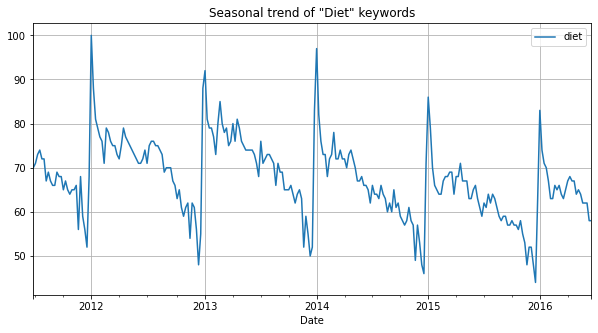

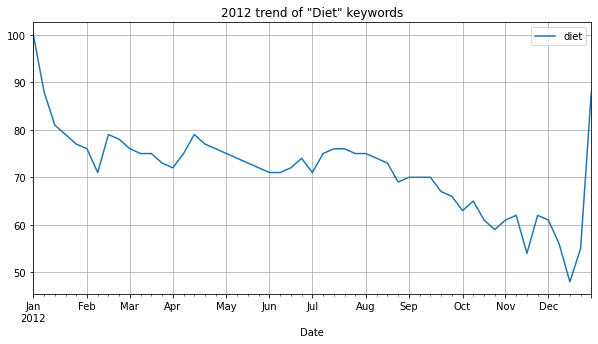

In [5]:
# Convert the date index to datetime
diet.index = pd.to_datetime(diet.index)

# Plot the entire time series diet and show gridlines
diet.plot(grid=True);
plt.title('Seasonal trend of "Diet" keywords');

# Slice the dataset to keep only 2012
diet2012 = diet[diet.index.year == 2012]

# Plot 2012 data
diet2012.plot(grid=True);
plt.title('2012 trend of "Diet" keywords');

### Merging Time Series With Different Dates
Stock and bond markets in the U.S. are closed on different days. For example, although the bond market is closed on Columbus Day (around Oct 12) and Veterans Day (around Nov 11), the stock market is open on those days. One way to see the dates that the stock market is open and the bond market is closed is to convert both indexes of dates into sets and take the difference in sets.

The pandas ```.join()``` method is a convenient tool to merge the stock and bond DataFrames on dates when both markets are open.
Stock prices and 10-year US Government bond yields is downloaded from [FRED](https://fred.stlouisfed.org/)


- Preprocess

In [4]:
stocks = pd.read_csv('./dataset/stocks.csv', index_col=0)
bonds = pd.read_csv('./dataset/bonds.csv', index_col=0)

In [5]:
stocks.index = pd.to_datetime(stocks.index)
bonds.index = pd.to_datetime(bonds.index)

In [6]:
# Convert the stock index and bond index into sets
set_stock_dates = set(stocks.index)
set_bond_dates = set(bonds.index)

# Take the difference between the sets and print
print(set_stock_dates - set_bond_dates)

# Merge stocks and bonds DataFrame using join()
stocks_and_bonds = stocks.join(bonds, how='inner')

{Timestamp('2015-11-11 00:00:00'), Timestamp('2010-10-11 00:00:00'), Timestamp('2008-11-11 00:00:00'), Timestamp('2009-11-11 00:00:00'), Timestamp('2011-11-11 00:00:00'), Timestamp('2010-11-11 00:00:00'), Timestamp('2013-11-11 00:00:00'), Timestamp('2007-10-08 00:00:00'), Timestamp('2014-10-13 00:00:00'), Timestamp('2017-06-09 00:00:00'), Timestamp('2012-10-08 00:00:00'), Timestamp('2016-10-10 00:00:00'), Timestamp('2016-11-11 00:00:00'), Timestamp('2013-10-14 00:00:00'), Timestamp('2012-11-12 00:00:00'), Timestamp('2015-10-12 00:00:00'), Timestamp('2008-10-13 00:00:00'), Timestamp('2009-10-12 00:00:00'), Timestamp('2011-10-10 00:00:00'), Timestamp('2007-11-12 00:00:00'), Timestamp('2014-11-11 00:00:00')}


## Correlation of Two Time Series


### Correlation of Stocks and Bonds
Investors are often interested in the correlation between the returns of two different assets for asset allocation and hedging purposes. In this exercise, you'll try to answer the question of whether stocks are positively or negatively correlated with bonds. Scatter plots are also useful for visualizing the correlation between the two variables.

Keep in mind that you should compute the correlations on the percentage changes rather than the levels.

Correlation of stocks and interest rates:  0.411944888624927


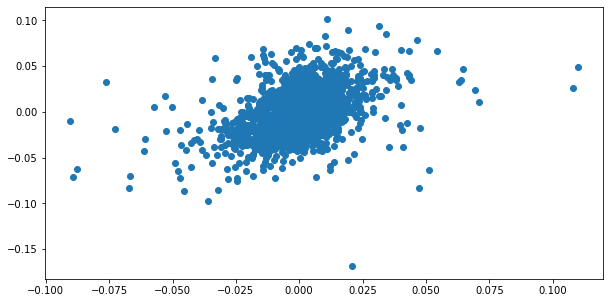

In [7]:
# Compute percent change using pct_change()
returns = stocks_and_bonds.pct_change()

# Compute correlation using corr()
correlation = returns['SP500'].corr(returns['US10Y'])
print("Correlation of stocks and interest rates: ", correlation)

# Make scatter plot
plt.scatter(returns['SP500'], returns['US10Y']);

The positive correlation means that when interest rates go down, stock prices go down. For example, during crises like 9/11, investors sold stocks and moved their money to less risky bonds (this is sometimes referred to as a 'flight to quality'). During these periods, stocks drop and interest rates drop as well. Of course, there are times when the opposite relationship holds too.

### Flying Saucers Aren't Correlated to Flying Markets
Two trending series may show a strong correlation even if they are completely unrelated. This is referred to as "spurious correlation". That's why when you look at the correlation of say, two stocks, you should look at the correlation of their returns and not their levels.

To illustrate this point, calculate the correlation between the levels of the stock market and the annual sightings of UFOs. Both of those time series have trended up over the last several decades, and the correlation of their levels is very high. Then calculate the correlation of their percent changes. This will be close to zero, since there is no relationship between those two series.

UFO data was downloaded from [www.nuforc.org](www.nuforc.org).

- Preprocess

In [8]:
DJI = pd.read_csv('./dataset/DJI.csv', index_col=0)
DJI.columns = ['DJI']
DJI.head()

,DJI
Date,
1941,110.96
1942,119.40
1943,135.89
1944,152.32
1945,192.91


In [9]:
UFO = pd.read_csv('./dataset/UFO.csv', index_col=0)
UFO.columns = ['UFO']
UFO.head()

,UFO
Date,
1941,1
1942,2
1943,9
1944,9
1945,9


In [10]:
UFO.index = pd.to_datetime(UFO.index, format="%Y")
DJI.index = pd.to_datetime(DJI.index, format="%Y")

In [11]:
levels = UFO.join(DJI, how='inner')
levels.head()

,UFO,DJI
Date,,
1941-01-01,1,110.96
1942-01-01,2,119.40
1943-01-01,9,135.89
1944-01-01,9,152.32
1945-01-01,9,192.91


Text(0, 0.5, 'Dow Jones Average/Number of Sightings')

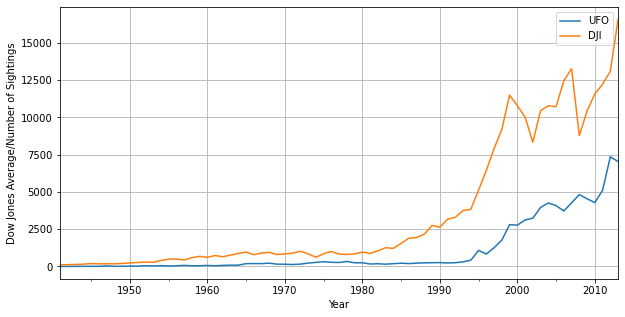

In [12]:
levels.plot(grid=True);
plt.xlabel('Year');
plt.ylabel('Dow Jones Average/Number of Sightings')

In [13]:
# Compute correlation o f levels
correlation1 = levels['DJI'].corr(levels['UFO'])
print("Correlation of levels: ", correlation1)

# Compute correlation fo percent changes
changes = levels.pct_change()
correlation2 = changes['DJI'].corr(changes['UFO'])
print("Correlation of changes: ", correlation2)

Correlation of levels:  0.9399762210726432
Correlation of changes:  0.06026935462405376


## Simple Linear Regression
- What is a Regression?
    - Simple linear regression: $y_t = \alpha + \beta x_t + \epsilon_t$
- Relationship between R-Squared and Correlation
    - $[corr(x, y)]^2 = R^2$
    - $sign(corr) = sign(\text{regression slope})$

### Looking at a Regression's R-Squared
R-squared measures how closely the data fit the regression line, so the R-squared in a simple regression is related to the correlation between the two variables. In particular, the magnitude of the correlation is the square root of the R-squared and the sign of the correlation is the sign of the regression coefficient.

In this exercise, you will start using the statistical package ```statsmodels```, which performs much of the statistical modeling and testing that is found in R and software packages like SAS and MATLAB.

You will take two series, ```x``` and ```y```, compute their correlation, and then regress ```y``` on ```x``` using the function ```OLS(y,x)``` in the ```statsmodels.api``` library (note that the dependent, or right-hand side variable y is the first argument). Most linear regressions contain a constant term which is the intercept (the $\alpha$ in the regression $y_t = \alpha + \beta x_t + \epsilon_t$). To include a constant using the function ```OLS()```, you need to add a column of 1's to the right hand side of the regression.

1. Simple Linear Regressions
In this video you'll learn about simple linear regressions of time series.


2. What is a Regression?
A simple linear regression finds the slope, beta, and intercept, alpha, of a line that's the best fit between a dependent variable, y, and an independent variable, x. The x's and y's can be two time series.


3. What is a Regression?
A linear regression is also known as Ordinary Least Squares, or OLS, because it minimizes the sum of the squared distances between the data points and the regression line


4. Python Packages to Perform Regressions
Regression techniques are very common, and therefore there are many packages in Python that can be used. In statsmodels, there is OLS. In numpy, there is polyfit, and if you set degree equals 1, it fits the data to a line, which is a linear regression. Pandas has an ols method, and scipy has a linear regression function. Beware that the order of x and y is not consistent across package


5. Relationship Between R-Squared and Correlation
From the scatter diagrams, you saw that the correlation measures how closely the data are clustered along a line. The R-squared also measures how well the linear regression line fits the data. So as you would expect, there is a relationship between correlation and R-squared. The magnitude of the correlation is the square root of the R-squared. And the sign of the correlation is the sign of the slope of the regression line. If the regression line is positively sloped, the correlation is positive and if the the regression line is negatively sloped, the correlation is negative. In the example you just analyzed, of large cap and small cap stocks, the R-Squared was 0-point-753, the slope of the regression was positive, so the correlation is then positive the square root of 0-point-753, or 0-point-868, which can be verified by computing the correlation directly.


- Preprocess

In [14]:
df_x = pd.read_csv('./dataset/x.csv', index_col=0, header=None)
df_y = pd.read_csv('./dataset/y.csv', index_col=0, header=None)

df_x.columns = ['x']
df_y.columns = ['y']

x = df_x.reset_index(drop=True)['x']
y = df_y.reset_index(drop=True)['y']

In [15]:
y

0     -0.835129
1     -0.061004
2     -0.194677
3     -2.461142
4      1.040073
         ...   
995   -1.017080
996   -0.430943
997    1.989779
998   -1.171907
999   -1.565902
Name: y, Length: 1000, dtype: float64

In [17]:
import statsmodels.api as sm

# Compute correlation of x and y
correlation = x.corr(y)
print("The correlation between x and y is %4.2f" % (correlation))

# Convert the Series x to a DataFrame and name the column x
dfx = pd.DataFrame(x, columns=['x'])

# Add a constant to the DataFrame dfx
dfx1 = sm.add_constant(dfx)

# Regress y on dfx1
result = sm.OLS(y, dfx1).fit()

# Print out the results and look at the relationship between R-squared and the correlation above
print(result.summary())

The correlation between x and y is -0.90
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     4471.
Date:                Mon, 15 Nov 2021   Prob (F-statistic):               0.00
Time:                        10:12:11   Log-Likelihood:                -560.10
No. Observations:                1000   AIC:                             1124.
Df Residuals:                     998   BIC:                             1134.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      

## Autocorrelation
- Correlation of a time series with a lagged copy of itself
- Lag-one autocorrelation
- Also called **serial correlation**

### A Popular Strategy Using Autocorrelation
One puzzling anomaly with stocks is that investors tend to overreact to news. Following large jumps, either up or down, stock prices tend to reverse. This is described as mean reversion in stock prices: prices tend to bounce back, or revert, towards previous levels after large moves, which are observed over time horizons of about a week. A more mathematical way to describe mean reversion is to say that stock returns are negatively autocorrelated.

This simple idea is actually the basis for a popular hedge fund strategy. If you're curious to learn more about this hedge fund strategy (although it's not necessary reading for anything else later in the course), see [here](https://www.quantopian.com/posts/enhancing-short-term-mean-reversion-strategies-1).

You'll look at the autocorrelation of weekly returns of MSFT stock from 2012 to 2017. You'll start with a DataFrame ```MSFT``` of daily prices. You should use the ```.resample()``` method to get weekly prices and then compute returns from prices. Use the pandas method ```.autocorr()``` to get the autocorrelation and show that the autocorrelation is negative. Note that the ```.autocorr()``` method only works on Series, not DataFrames (even DataFrames with one column), so you will have to select the column in the DataFrame.

 What is Autocorrelation?
 
So far, you have looked at the correlation of two time series. Autocorrelation is the correlation of a single time series with a lagged copy of itself. It's also called "serial correlation". Often, when we refer to a series's autocorrelation, we mean the "lag-one" autocorrelation. So when using daily data, for example, the autocorrelation would be the correlation of the series with the same series lagged by one day.

If a series has positive autocorrelation, we say it is "trend-following".

- Preprocess

In [20]:
MSFT = pd.read_csv('./dataset/MSFT.csv', index_col=0)
MSFT.index = pd.to_datetime(MSFT.index, format="%m/%d/%Y")
MSFT.head()

,Adj Close
Date,
2012-08-06,26.107651
2012-08-07,26.377876
2012-08-08,26.438896
2012-08-09,26.587088
2012-08-10,26.517351


In [21]:
# Convert the daily data to weekly data
MSFT = MSFT.resample(rule='W').last()

# Compute the percentage change of prices
returns = MSFT.pct_change()

# Compute and print the autocorrelation of returns
autocorrelation = returns['Adj Close'].autocorr()
print('The auto correlation of weekly returns is %4.2f' % (autocorrelation))

The auto correlation of weekly returns is -0.16


### Are Interest Rates Autocorrelated?
When you look at daily changes in interest rates, the autocorrelation is close to zero. However, if you resample the data and look at annual changes, the autocorrelation is negative. This implies that while short term changes in interest rates may be uncorrelated, long term changes in interest rates are negatively autocorrelated. A daily move up or down in interest rates is unlikely to tell you anything about interest rates tomorrow, but a move in interest rates over a year can tell you something about where interest rates are going over the next year. And this makes some economic sense: over long horizons, when interest rates go up, the economy tends to slow down, which consequently causes interest rates to fall, and vice versa.

- Preprocess

In [22]:
daily_rates = pd.read_csv('./dataset/daily_rates.csv', index_col=0, parse_dates=['DATE'])
daily_rates.head()

,US10Y
DATE,
1962-01-02,4.06
1962-01-03,4.03
1962-01-04,3.99
1962-01-05,4.02
1962-01-08,4.03


In [23]:
# Compute the daily change in interest rates
daily_diff = daily_rates.diff()

# Compute and print the autocorrelation of daily changes
autocorrelation_daily = daily_diff['US10Y'].autocorr()
print("The autocorrelation of daily interest rate changes is %4.2f" %(autocorrelation_daily))

# Convert the daily data to annual data
yearly_rates = daily_rates.resample(rule='A').last()

# Repeat above for annual data
yearly_diff = yearly_rates.diff()
autocorrelation_yearly = yearly_diff['US10Y'].autocorr()
print("The autocorrelation of annual interest rate changes is %4.2f" %(autocorrelation_yearly))

The autocorrelation of daily interest rate changes is 0.07
The autocorrelation of annual interest rate changes is -0.22


## Chapter 2: Some Simple Time Series

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (10, 5)

#### Autocorrelation Function
 - Autocorrelation Function (ACF) : The autocorrelation as a function of the lag

#### Taxing Exercise: Compute the ACF
In the last chapter, you computed autocorrelations with one lag. Often we are interested in seeing the autocorrelation over many lags. The quarterly earnings for H&R Block (ticker symbol HRB) is plotted on the right, and you can see the extreme cyclicality of its earnings. A vast majority of its earnings occurs in the quarter that taxes are due.

You will compute the array of autocorrelations for the H&R Block quarterly earnings. Then, plot the autocorrelation function using the plot_acf module. This plot shows what the autocorrelation function looks like for cyclical earnings data. The ACF at lag=0 is always one, of course. In the next exercise, you will learn about the confidence interval for the ACF, but for now, suppress the confidence interval by setting alpha=1.

In [25]:
HRB = pd.read_csv('./dataset/HRB.csv', index_col=0)
HRB.index = pd.to_datetime(HRB.index) + pd.offsets.QuarterBegin(startingMonth=1)
HRB.head()

,Earnings
Quarter,
2007-04-01,-0.36
2007-07-01,-0.38
2007-10-01,0.07
2008-01-01,1.85
2008-04-01,-0.34


<AxesSubplot:xlabel='Quarter'>

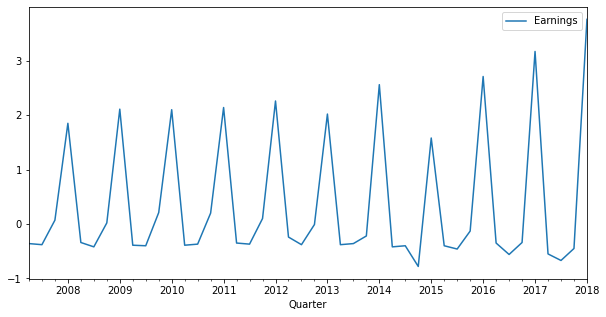

In [26]:
HRB.plot()

[ 1.         -0.22122696 -0.39856504 -0.26615093  0.83479804 -0.1901038
 -0.3475634  -0.23140368  0.71995993 -0.15661007 -0.29766783 -0.22097189
  0.61656933 -0.15022869 -0.27922022 -0.22465946  0.5725259  -0.08758288
 -0.24075584 -0.20363054  0.4797058  -0.06091139 -0.20935484 -0.18303202
  0.42481275 -0.03352559 -0.17471087 -0.16384328  0.34341079 -0.01734364
 -0.13820811 -0.12232172  0.28407164 -0.01927656 -0.11757974 -0.10386933
  0.20156485 -0.0120634  -0.07509539 -0.0707104   0.10222029]


C:\Users\archu\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:657: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
C:\Users\archu\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


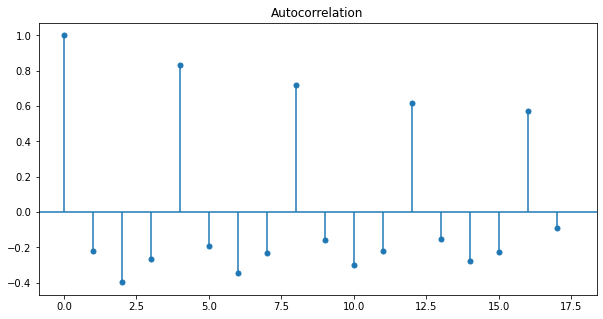

In [32]:
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

# Compute the acf array of HRB
acf_array = acf(HRB)
print(acf_array)

# Plot the acf function
plot_acf(HRB, alpha=1);

#### Are We Confident This Stock is Mean Reverting?
In the last chapter, you saw that the autocorrelation of MSFT's weekly stock returns was -0.16. That autocorrelation seems large, but is it statistically significant? In other words, can you say that there is less than a 5% chance that we would observe such a large negative autocorrelation if the true autocorrelation were really zero? And are there any autocorrelations at other lags that are significantly different from zero?

Even if the true autocorrelations were zero at all lags, in a finite sample of returns you won't see the estimate of the autocorrelations exactly zero. In fact, the standard deviation of the sample autocorrelation is  1𝑁√  where  𝑁  is the number of observations, so if  𝑁=100 , for example, the standard deviation of the ACF is 0.1, and since 95% of a normal curve is between +1.96 and -1.96 standard deviations from the mean, the 95% confidence interval is  ±1.96𝑁√ . This approximation only holds when the true autocorrelations are all zero.

In [34]:
MSFT = pd.read_csv('./dataset/MSFT.csv', index_col=0)
MSFT.index = pd.to_datetime(MSFT.index, format="%m/%d/%Y")
MSFT.head()

,Adj Close
Date,
2012-08-06,26.107651
2012-08-07,26.377876
2012-08-08,26.438896
2012-08-09,26.587088
2012-08-10,26.517351


In [35]:
# Convert the daily data to weekly data
MSFT = MSFT.resample(rule='W').last()

# Compute the percentage change of prices
returns = MSFT.pct_change().dropna()

The autocorrelation of weekly MSFT returns is -0.16
The approximate confidence interval is +/- 0.12


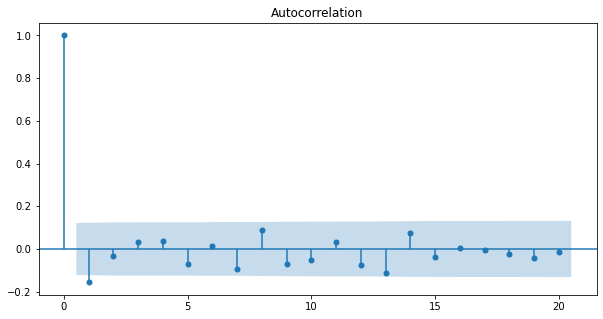

In [36]:
from math import sqrt

# Compute and print the autocorrelation of MSFT weekly returns
autocorrelation = returns['Adj Close'].autocorr()
print("The autocorrelation of weekly MSFT returns is %4.2f" %(autocorrelation))

# Find the number of observations by taking the length of the returns DataFrame
nobs = len(returns)

# Compute the approximate confidence interval
conf = 1.96 / sqrt(nobs)
print("The approximate confidence interval is +/- %4.2f" % (conf))

# Plot the autocorrelation function with 95% confidence intervals and 20 lags using plot_acf
plot_acf(returns, alpha=0.05, lags=20);

#### White Noise

What is White Noise?

White Noise is a series with:

 - Constant mean
 - Constant variance
 - Zero autocorrelation at all lags
 
Special Case: if data has normal distribution, then Guassian White Noise

##### What is White Noise?
is that it is a series with mean that is constant with time, a variance that is also constant with time, and zero autocorrelation at all lags. There are several special cases of White Noise. For example, if the data is white noise but also has a normal, or Gaussian, distribution, then it is called Gaussian White Noise.

3. Simulating White Noise
numpy random normal creates an array of normally distributed random numbers. The loc argument is the mean and the scale argument is the standard deviation. This is one way to generate a white noise series.

The mean is 0.020 and the standard deviation is 0.051


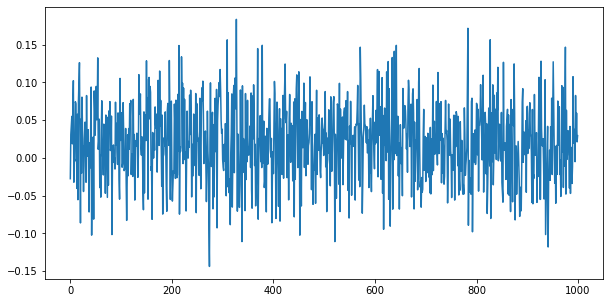

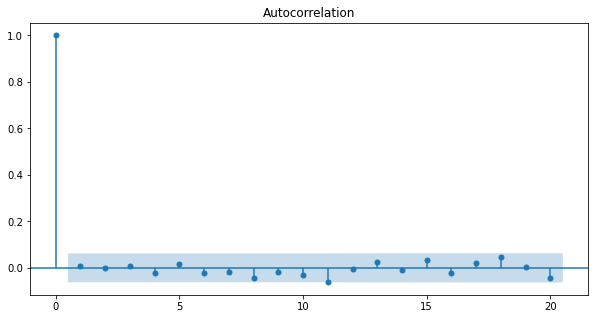

In [37]:
# Import the plot_acf module from statsmodels
from statsmodels.graphics.tsaplots import plot_acf

# Simulate white noise returns
returns = np.random.normal(loc=0.02, scale=0.05, size=1000)

# Print out the mean and standard deviation of returns
mean = np.mean(returns)
std = np.std(returns)
print("The mean is %5.3f and the standard deviation is %5.3f" %(mean,std))

# Plot returns series
plt.plot(returns)
plt.show()

# Plot autocorrelation function of white noise returns
plot_acf(returns, lags=20)
plt.show()

#### Random Walk
What is a Random Walk?
Today's Price = Yesterday's Price + Noise
𝑃𝑡=𝑃𝑡−1+𝜖𝑡
 
Change in price is white noise
𝑃𝑡−𝑃𝑡−1=𝜖𝑡
 
Cannot forecast a random walk
Best forecast for tomorrow's price is today's price
Random Walk with drift:
𝑃𝑡=𝜇+𝑃𝑡−1+𝜖𝑡
 
Change in price is white noise with non-zero mean:
𝑃𝑡−𝑃𝑡−1=𝜇+𝜖𝑡
 
Statistical Test for Random Walk
Random walk with drift
𝑃𝑡=𝜇+𝑃𝑡−1+𝜖𝑡
 
Regression test for random walk
𝑃𝑡=𝛼+𝛽𝑃𝑡−1+𝜖𝑡
 
It is equivalent to:
𝑃𝑡−𝑃𝑡−1=𝛼+𝛽𝑃𝑡−1+𝜖𝑡
 
Test:
𝐻0:𝛽=0  (random walk)
𝐻1:𝛽<0  (not random walk)

#### Generate a Random Walk
Whereas stock returns are often modeled as white noise, stock prices closely follow a random walk. In other words, today's price is yesterday's price plus some random noise.

You will simulate the price of a stock over time that has a starting price of 100 and every day goes up or down by a random amount. Then, plot the simulated stock price. If you hit the "Run Code" code button multiple times, you'll see several realizations.

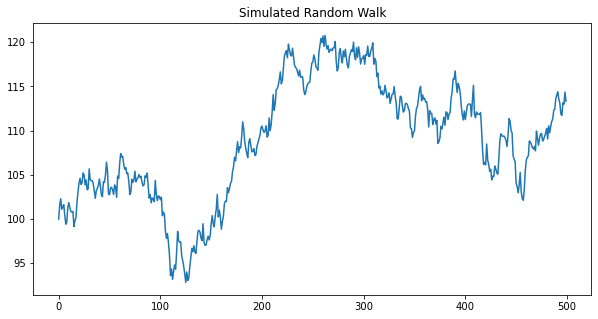

In [38]:
# Generate 500 random steps with mean=0 and standard deviation=1
steps = np.random.normal(loc=0, scale=1, size=500)

# Set first element to 0 so that the first price will be the starting stock price
steps[0]=0

# Simulate stock prices, P with a starting price of 100
P = 100 + np.cumsum(steps)

# Plot the simulated stock prices
plt.plot(P)
plt.title("Simulated Random Walk")
plt.show()

### Get the Drift
In the last exercise, you simulated stock prices that follow a random walk. You will extend this in two ways in this exercise.

You will look at a random walk with a drift. Many time series, like stock prices, are random walks but tend to drift up over time.
In the last exercise, the noise in the random walk was additive: random, normal changes in price were added to the last price. However, when adding noise, you could theoretically get negative prices. Now you will make the noise multiplicative: you will add one to the random, normal changes to get a total return, and multiply that by the last price.

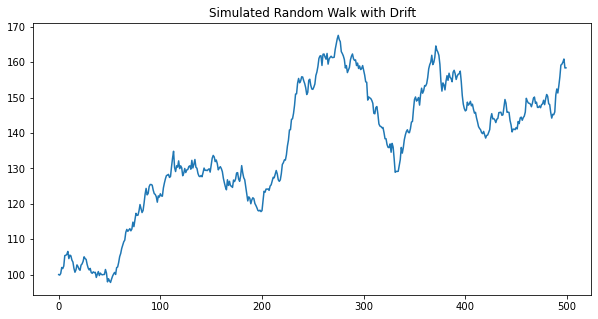

In [39]:
# Generate 500 random steps
steps = np.random.normal(loc=0.001, scale=0.01, size=500) + 1

# Set first element to 1
steps[0]=1

# Simulate the stock price, P, by taking the cumulative product
P = 100 * np.cumprod(steps)

# Plot the simulated stock prices
plt.plot(P)
plt.title("Simulated Random Walk with Drift")
plt.show()

#### Are Stock Prices a Random Walk?
Most stock prices follow a random walk (perhaps with a drift). You will look at a time series of Amazon stock prices, pre-loaded in the DataFrame AMZN, and run the 'Augmented Dickey-Fuller Test' from the statsmodels library to show that it does indeed follow a random walk.

With the ADF test, the "null hypothesis" (the hypothesis that we either reject or fail to reject) is that the series follows a random walk. Therefore, a low p-value (say less than 5%) means we can reject the null hypothesis that the series is a random walk.

In [40]:
AMZN = pd.read_csv('./dataset/AMZN.csv', index_col=0)
AMZN.index = pd.to_datetime(AMZN.index, format='%m/%d/%Y')
AMZN.head()

,Adj Close
Date,
1997-05-15,1.958333
1997-05-16,1.729167
1997-05-19,1.708333
1997-05-20,1.635417
1997-05-21,1.427083


In [41]:
# Import the adfuller module from statsmodels
from statsmodels.tsa.stattools import adfuller

# Run the ADF test on the price series and print out the results
results = adfuller(AMZN['Adj Close'])
print(results)

# Just print out the p-value
print('The p-value of the test on prices is: ' + str(results[1]))

(4.02516852577074, 1.0, 33, 5054, {'1%': -3.4316445438146865, '5%': -2.862112049726916, '10%': -2.5670745025321304}, 30308.64216426981)
The p-value of the test on prices is: 1.0


#### How About Stock Returns?
In the last exercise, you showed that Amazon stock prices, contained in the DataFrame AMZN follow a random walk. In this exercise. you will do the same thing for Amazon returns (percent change in prices) and show that the returns do not follow a random walk.

In [42]:
# Import the adfuller module from statsmodels
from statsmodels.tsa.stattools import adfuller

# Create a DataFrame of AMZN returns
AMZN_ret = AMZN.pct_change()

# Eliminate the NaN in the first row of returns
AMZN_ret = AMZN_ret.dropna()

# Run the ADF test on the return series and print out the p-value
results = adfuller(AMZN_ret["Adj Close"])
print('The p-value of the test on returns is: ' + str(results[1]))

The p-value of the test on returns is: 2.565589808347588e-22


#### Stationarity

What is Stationary?

 - Strong stationary: entire distribution of data is time-invariant

 - Weak stationary: mean, variance and autocorrelation are time-invariant.

(i.e., for autocorrelation,  𝑐𝑜𝑟𝑟(𝑋𝑡,𝑋𝑡−𝜏)  is only a function of  𝜏 )

Why do we care?

 - If parameters vary with time, too many paramters to estimate
 - Can only estimate a parsimonious model with a few parameters

#### Seasonal Adjustment During Tax Season
Many time series exhibit strong seasonal behavior. The procedure for removing the seasonal component of a time series is called seasonal adjustment. For example, most economic data published by the government is seasonally adjusted.

You saw earlier that by taking first differences of a random walk, you get a stationary white noise process. For seasonal adjustments, instead of taking first differences, you will take differences with a lag corresponding to the periodicity.

Look again at the ACF of H&R Block's quarterly earnings, pre-loaded in the DataFrame HRB, and there is a clear seasonal component. The autocorrelation is high for lags 4,8,12,16,… because of the spike in earnings every four quarters during tax season. Apply a seasonal adjustment by taking the fourth difference (four represents the periodicity of the series). Then compute the autocorrelation of the transformed series.

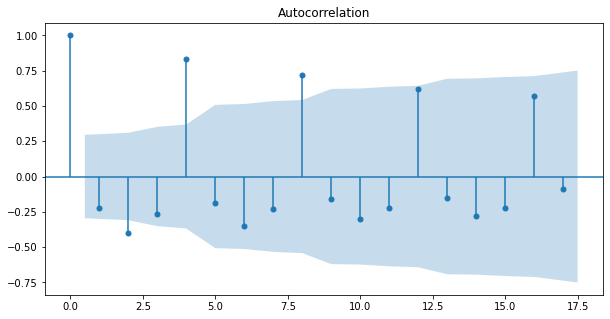

In [43]:
plot_acf(HRB);

            Earnings
Quarter             
2007-04-01       NaN
2007-07-01       NaN
2007-10-01       NaN
2008-01-01       NaN
2008-04-01      0.02
2008-07-01     -0.04
2008-10-01     -0.05
2009-01-01      0.26
2009-04-01     -0.05
2009-07-01      0.02


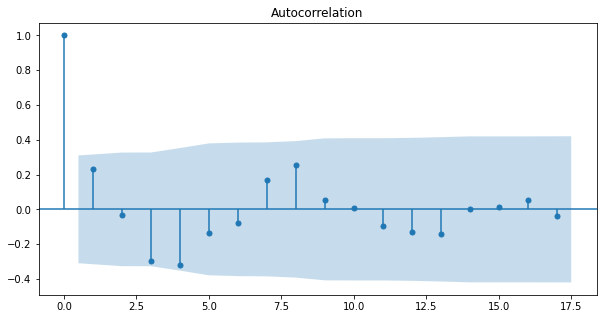

In [44]:
# Import the plot_acf module from statsmodels
from statsmodels.graphics.tsaplots import plot_acf

# Seasonally adjust quarterly earnings
HRBsa = HRB.diff(4)

# Print the first 10 rows of the seasonally adjusted series
print(HRBsa.head(10))

# Drop the NaN data in the first four rows
HRBsa = HRBsa.dropna()

# Plot the autocorrelation function of the seasonally adjusted series
plot_acf(HRBsa)
plt.show()

## Chapter 3: Autoregressive (AR) Models

#### Describe AR Model

Mathematical Description of AR(1) Model

𝑅𝑡=𝜇+𝜙𝑅𝑡−1+𝜖𝑡   -  Since there is only one lagged value on the right hand side, this is called an AR model of order 1, or simply an AR(1) model. If the AR parameter, phi, is one, then the process is a random walk. If phi is zero, then the process is white noise. In order for the process to be stable and stationary, phi has to be between -1 and +1.
 
Since only one lagged value or right hand side, this is called,
AR model of order 1 or, AR(1) model

AR paramter  𝜙 

For stationary,  −1<𝜙<1 

Interpretation of AR(1) Parameter

Negative  𝜙 : Mean Reversion

Positive  𝜙 : Momentum

High order AR Models

AR(1)

𝑅𝑡=𝜇+𝜙1𝑅𝑡−1+𝜖𝑡

 
AR(2)

𝑅𝑡=𝜇+𝜙1𝑅𝑡−1+𝜙2𝑅𝑡−2+𝜖𝑡
 
AR(3)

𝑅𝑡=𝜇+𝜙1𝑅𝑡−1+𝜙2𝑅𝑡−2+𝜙3𝑅𝑡−3+𝜖𝑡
 
⋯

#### Simulate AR(1) Time Series
You will simulate and plot a few AR(1) time series, each with a different parameter,  𝜙 , using the arima_process module in statsmodels. In this exercise, you will look at an AR(1) model with a large positive  𝜙  and a large negative  𝜙 , but feel free to play around with your own parameters.

There are a few conventions when using the arima_process module that require some explanation. First, these routines were made very generally to handle both AR and MA models. We will cover MA models next, so for now, just ignore the MA part. Second, when inputting the coefficients, you must include the zero-lag coefficient of 1, and the sign of the other coefficients is opposite what we have been using (to be consistent with the time series literature in signal processing). For example, for an AR(1) process with  𝜙 =0.9, the array representing the AR parameters would be ar = np.array([1, -0.9])

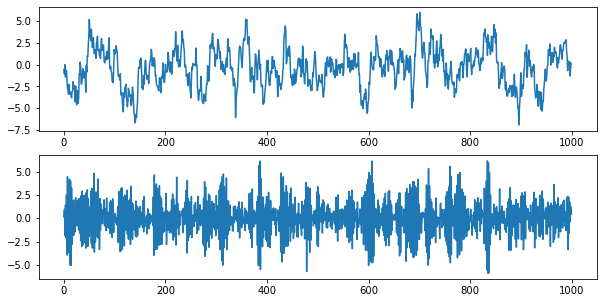

In [6]:
from statsmodels.tsa.arima_process import ArmaProcess

# Plot 1: AR parameter = +0.9
plt.subplot(2, 1, 1)
ar1 = np.array([1, -0.9])
ma1 = np.array([1])
AR_object1 = ArmaProcess(ar1, ma1)
simulated_data_1 = AR_object1.generate_sample(nsample=1000)
plt.plot(simulated_data_1);

# Plot 2: AR parameter = -0.9
plt.subplot(2, 1, 2)
ar2 = np.array([1, 0.9])
ma2 = np.array([1])
AR_object2 = ArmaProcess(ar2, ma2)
simulated_data_2 = AR_object2.generate_sample(nsample=1000)
plt.plot(simulated_data_2);

#### Compare the ACF for Several AR Time Series
The autocorrelation function decays exponentially for an AR time series at a rate of the AR parameter. For example, if the AR parameter,  𝜙=+0.9 , the first-lag autocorrelation will be  0.9 , the second-lag will be  (0.9)2=0.81 , the third-lag will be  (0.9)3=0.729 , etc. A smaller AR parameter will have a steeper decay, and for a negative AR parameter, say  −0.9 , the decay will flip signs, so the first-lag autocorrelation will be  −0.9 , the second-lag will be  (−0.9)2=0.81 , the third-lag will be  (−0.9)3=−0.729 , etc.

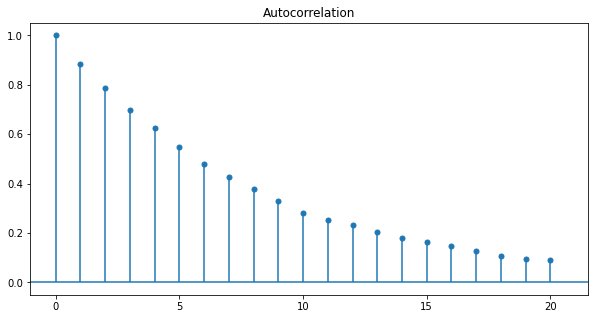

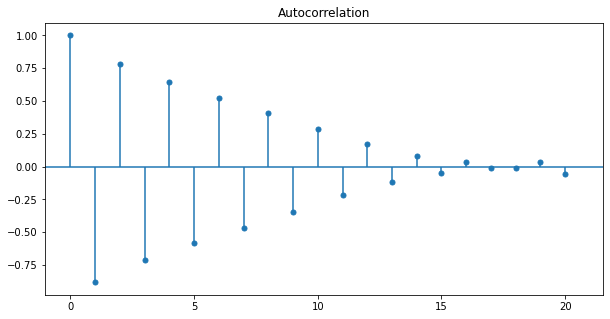

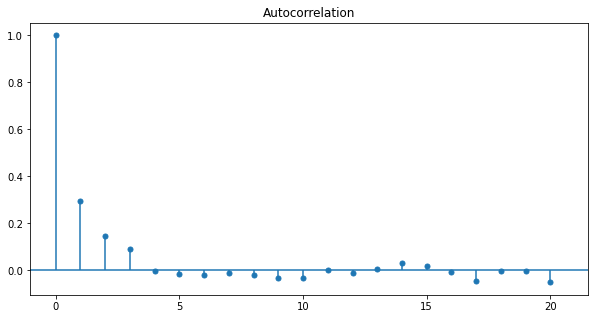

In [8]:
from statsmodels.graphics.tsaplots import plot_acf

# AR parameter = +0.3
ar3 = np.array([1, -0.3])
ma3 = np.array([1])
AR_object3 = ArmaProcess(ar3, ma3)
simulated_data_3 = AR_object3.generate_sample(nsample=1000)

# Plot 1: AR parameter = +0.9
plot_acf(simulated_data_1, alpha=1, lags=20);

# Plot 2: AR parameter = -0.9
plot_acf(simulated_data_2, alpha=1, lags=20);

# Plot 3: AR parameter = +0.3
plot_acf(simulated_data_3, alpha=1, lags=20);


#### Estimating and Forecasting AR Model

#### Estimating an AR Model

You will estimate the AR(1) parameter,  𝜙 , of one of the simulated series that you generated in the earlier exercise. Since the parameters are known for a simulated series, it is a good way to understand the estimation routines before applying it to real data.

In [5]:
# Import the ARMA module from statsmodels
from statsmodels.tsa.arima_model import ARMA

# Fit an AR(1) model to the first simulated data
mod = ARMA(simulated_data_1, order=(1, 0))
res = mod.fit()

# Print out summary information on the fit
print(res.summary())

# Print out the estimate for the constant and for phi
print("When the true phi=0.9, the estimate of phi (and the constant) are:")
print(res.params)

NameError: name 'simulated_data_1' is not defined

#### Forecasting with an AR Model

In addition to estimating the parameters of a model that you did in the last exercise, you can also do forecasting, both in-sample and out-of-sample using statsmodels. The in-sample is a forecast of the next data point using the data up to that point, and the out-of-sample forecasts any number of data points in the future. These forecasts can be made using either the predict() method if you want the forecasts in the form of a series of data, or using the plot_predict() method if you want a plot of the forecasted data. You supply the starting point for forecasting and the ending point, which can be any number of data points after the data set ends.

C:\Users\archu\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


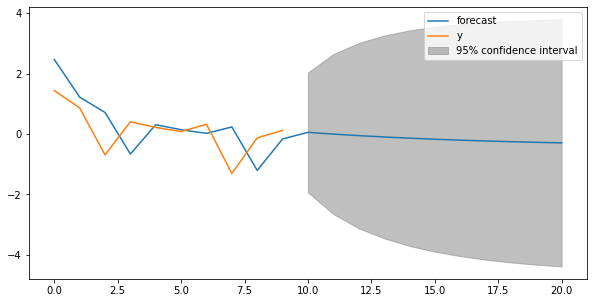

In [10]:
# Import the ARMA module from statsmodels
from statsmodels.tsa.arima_model import ARMA

# Forecast the first AR(1) model
mod = ARMA(simulated_data_1, order=(1, 0))
res = mod.fit()
res.plot_predict(start=990, end=1010)
plt.show()

#### Let's Forecast Interest Rates
You will now use the forecasting techniques you learned in the last exercise and apply it to real data rather than simulated data. You will revisit a dataset from the first chapter: the annual data of 10-year interest rates going back 56 years, which is in a Series called interest_rate_data. Being able to forecast interest rates is of enormous importance, not only for bond investors but also for individuals like new homeowners who must decide between fixed and floating rate mortgages.

You saw in the first chapter that there is some mean reversion in interest rates over long horizons. In other words, when interest rates are high, they tend to drop and when they are low, they tend to rise over time. Currently they are below long-term rates, so they are expected to rise, but an AR model attempts to quantify how much they are expected to rise.

In [12]:
bonds = pd.read_csv('./dataset/daily_rates.csv', index_col=0)
bonds.index = pd.to_datetime(bonds.index, format="%Y-%m-%d")
bonds.head()

,US10Y
DATE,
1962-01-02,4.06
1962-01-03,4.03
1962-01-04,3.99
1962-01-05,4.02
1962-01-08,4.03


In [13]:
interest_rate_data = bonds.resample(rule='A').last()
interest_rate_data.head()

,US10Y
DATE,
1962-12-31,3.85
1963-12-31,4.14
1964-12-31,4.21
1965-12-31,4.65
1966-12-31,4.64


C:\Users\archu\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


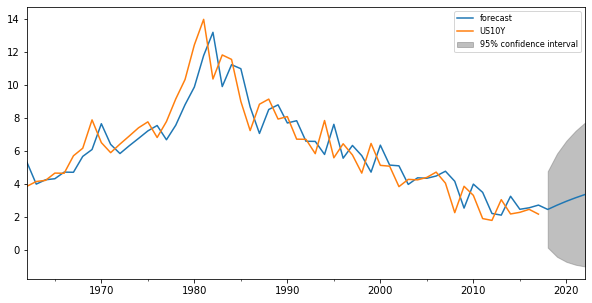

In [14]:
# Import the ARMA module from statsmodels
from statsmodels.tsa.arima_model import ARMA

# Forecast interest rates using an AR(1) model
mod = ARMA(interest_rate_data, order=(1, 0))
res = mod.fit()

# Plot the original series and the forecasted series
res.plot_predict(start=0, end="2022")
plt.legend(fontsize=8)
plt.show()

#### Compare AR Model with Random Walk
Sometimes it is difficult to distinguish between a time series that is slightly mean reverting and a time series that does not mean revert at all, like a random walk. You will compare the ACF for the slightly mean-reverting interest rate series of the last exercise with a simulated random walk with the same number of observations.

You should notice when plotting the autocorrelation of these two series side-by-side that they look very similar.

In [16]:
simulated_data = np.array([5.        , 4.77522278, 5.60354317, 5.96406402, 5.97965372,
       6.02771876, 5.5470751 , 5.19867084, 5.01867859, 5.50452928,
       5.89293842, 4.6220103 , 5.06137835, 5.33377592, 5.09333293,
       5.37389022, 4.9657092 , 5.57339283, 5.48431854, 4.68588587,
       5.25218625, 4.34800798, 4.34544412, 4.72362568, 4.12582912,
       3.54622069, 3.43999885, 3.77116252, 3.81727011, 4.35256176,
       4.13664247, 3.8745768 , 4.01630403, 3.71276593, 3.55672457,
       3.07062647, 3.45264414, 3.28123729, 3.39193866, 3.02947806,
       3.88707349, 4.28776889, 3.47360734, 3.33260631, 3.09729579,
       2.94652178, 3.50079273, 3.61020341, 4.23021143, 3.94289347,
       3.58422345, 3.18253962, 3.26132564, 3.19777388, 3.43527681,
       3.37204482])

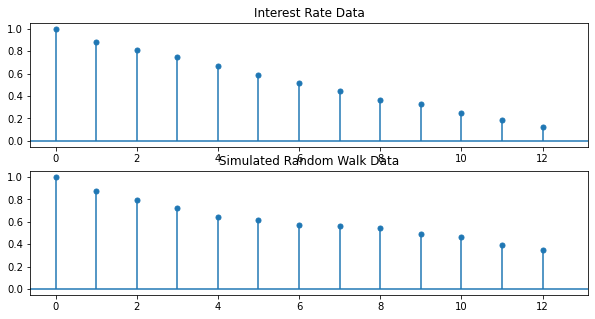

In [17]:
# Import the plot_acf module from statsmodels
from statsmodels.graphics.tsaplots import plot_acf

# Plot the interest rate series and the simulated random walk series side-by-side
fig, axes = plt.subplots(2,1)

# Plot the autocorrelation of the interest rate series in the top plot
fig = plot_acf(interest_rate_data, alpha=1, lags=12, ax=axes[0])

# Plot the autocorrelation of the simulated random walk series in the bottom plot
fig = plot_acf(simulated_data, alpha=1, lags=12, ax=axes[1])

# Label axes
axes[0].set_title("Interest Rate Data")
axes[1].set_title("Simulated Random Walk Data")
plt.show()

#### Partial Autocorrelation Function (PACF)
The Partial Autocorrelation Function measures the incremental benefit of adding another lag. Imagine running several regressions, where you regress returns on more and more lagged values. The coefficients in the red boxes represent the values of the partial autocorrelation function for different lags. For example, in the bottom row, the coefficient in the red box, phi 4-4, is the lag-4 value of the Partial Autocorrelation Function, and it represents how significant adding a fourth lag is when you already have three lags.

 - Information Criteria
 
The more parameters in a model, the better the model will fit the data. But this can lead to overfitting of the data. The information criteria adjusts the goodness-of-fit of a model by imposing a penalty based on the number of parameters used. Two common adjusted goodness-of-fit measures are called the Akaike Information Criterion and the Bayesian Information Criterion.

## Choosing the Right Model
- Identifying the Order of an AR Model
    - The order of an AR(p) model will usually be unknown
    - Two techniques to determine order
        - Partial Autocorrelation Funciton
        - Information criteria
- Partial Autocorrelation Function (PACF)
$$ \begin{aligned} R_t &= \phi_{0,1} + \color{red}{\phi_{1,1}} R_{t-1} + \epsilon_{1t} \\ 
R_t &= \phi_{0,2} + \phi_{1,2} R_{t-1} + \color{red}{\phi_{2,2}} R_{t-2} + \epsilon_{2t} \\
R_t &= \phi_{0,3} + \phi_{1,3} R_{t-1} + \phi_{2,3} R_{t-2} + \color{red}{\phi_{3,3}} R_{t-3} + \epsilon_{3t} \\
R_t &= \phi_{0,4} + \phi_{1,4} R_{t-1} + \phi_{2,4} R_{t-2} + \phi_{3,4} R_{t-3} + \color{red}{\phi_{4,4}} R_{t-4} + \epsilon_{4t} \\
\end{aligned} $$
- Information Criteria
    - Information criteria: adjusts goodness-of-fit for number of parameters
    - Two popular adjusted goodness-of-fit measures
        - AIC ([Akaike Information Criterion](https://en.wikipedia.org/wiki/Akaike_information_criterion))
        - BIC ([Bayesian Information Criterion](https://en.wikipedia.org/wiki/Bayesian_information_criterion))

#### Estimate Order of Model: PACF
One useful tool to identify the order of an AR model is to look at the Partial Autocorrelation Function (PACF). In this exercise, you will simulate two time series, an AR(1) and an AR(2), and calculate the sample PACF for each. You will notice that for an AR(1), the PACF should have a significant lag-1 value, and roughly zeros after that. And for an AR(2), the sample PACF should have significant lag-1 and lag-2 values, and zeros after that.

Just like you used the plot_acf function in earlier exercises, here you will use a function called plot_pacf in the statsmodels module.

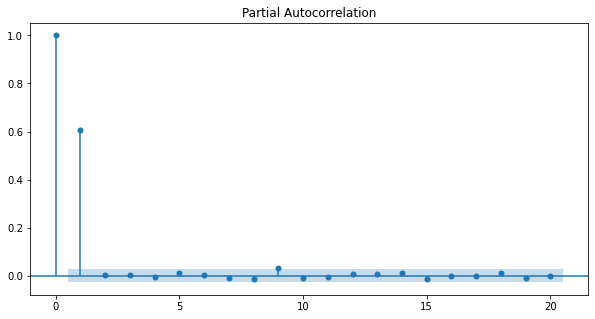

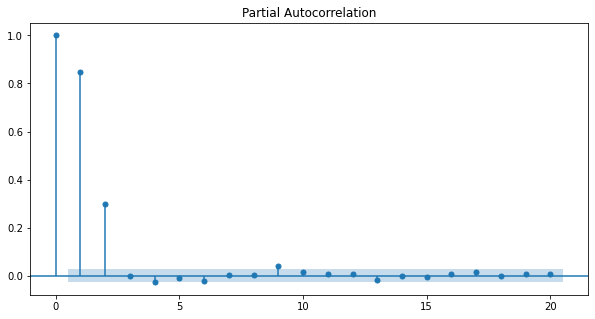

In [19]:
# Import the modules for simulating data and for plotting the PACF
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_pacf

# Simulate AR(1) with phi=+0.6
ma = np.array([1])
ar = np.array([1, -0.6])
AR_object = ArmaProcess(ar, ma)
simulated_data_1 = AR_object.generate_sample(nsample=5000)

# Plot PACF for AR(1)
plot_pacf(simulated_data_1, lags=20)
plt.show()

# Simulate AR(2) with phi1=+0.6, phi2=+0.3
ma = np.array([1])
ar = np.array([1, -0.6, -0.3])
AR_object = ArmaProcess(ar, ma)
simulated_data_2 = AR_object.generate_sample(nsample=5000)

# Plot PACF for AR(2)
plot_pacf(simulated_data_2, lags=20)
plt.show()

#### Estimate Order of Model: Information Criteria
Another tool to identify the order of a model is to look at the Akaike Information Criterion (AIC) and the Bayesian Information Criterion (BIC). These measures compute the goodness of fit with the estimated parameters, but apply a penalty function on the number of parameters in the model. You will take the AR(2) simulated data from the last exercise, saved as simulated_data_2, and compute the BIC as you vary the order, p, in an AR(p) from 0 to 6.

C:\Users\archu\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


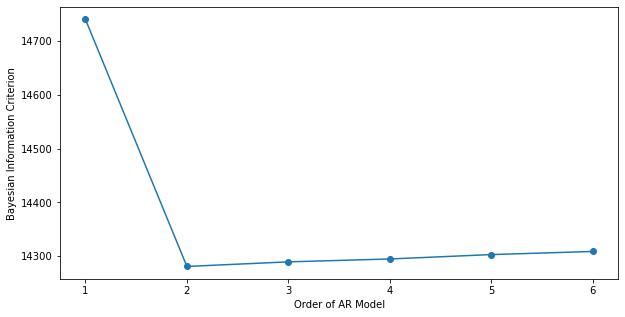

In [20]:
# Import the module for estimating an ARMA model
from statsmodels.tsa.arima_model import ARMA

# Fit the data to an AR(p) for p = 0,...,6 , and save the BIC
BIC = np.zeros(7)
for p in range(7):
    mod = ARMA(simulated_data_2, order=(p,0))
    res = mod.fit()
# Save BIC for AR(p)    
    BIC[p] = res.bic
    
# Plot the BIC as a function of p
plt.plot(range(1,7), BIC[1:7], marker='o')
plt.xlabel('Order of AR Model')
plt.ylabel('Bayesian Information Criterion')
plt.show()